**1. Load the data**

In [52]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/imdb-reviews_2.csv')
df.head()

,review,label
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


**2. Count the number of positive and negative sentiment**

In [53]:
sentiment_counts = df['label'].value_counts()
print("Sentiment counts:\n", sentiment_counts)

Sentiment counts:
 label
1    2528
0    2472
Name: count, dtype: int64


**3. Clean the text ‘review’ and create a column called ‘review_processed’**

**4. Replace short words as
df['review_processed'] = df['review_processed'].apply(lambda x:
' '.join([w for w in x.split() if len(w)>2]))**

**5. Make entire text lowercase**

**6. Remove stopwords**

**7. Make custom list of words to be removed including ‘movie’, ‘film’, ‘one’, ‘make’,
and ‘even’**

**8. Add to the list of words**

In [54]:
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define custom stopwords to be added
custom_stopwords = {'movie', 'film', 'one', 'make', 'even'}

# Combine default stopwords with custom stopwords
all_stopwords = stop_words.union(custom_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
# Clean the text and create a column 'review_processed'
df['review_processed'] = df['review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Replace short words (words with 2 or fewer letters)
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

# Convert the entire text to lowercase
df['review_processed'] = df['review_processed'].str.lower()

# Remove stopwords
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))

# Create a custom list of words to be removed and apply them
custom_stopwords = set(['movie', 'film', 'one', 'make', 'even'])
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if w not in all_stopwords]))

# Display the processed dataframe
df.head()

,review,label,review_processed
0,"first think another Disney movie, might good, ...",1,first think another disney might good kids wat...
1,"Put aside Dr. House repeat missed, Desperate H...",0,put aside house repeat missed desperate housew...
2,"big fan Stephen King's work, film made even gr...",1,big fan stephen kings work made greater fan ki...
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing needless say movies watch...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed acting terrific plot jeff combs ...


**9. Lemmatize the text**

**10. Convert NLTK tags into ‘wordnet’ tags**

**11. Find the part of speech tag**

**12. Lemmatize sentences using POS. Tokenize the sentence and find POS tag for each token**

**13. Define ‘wordnet_tagged.’ If there is no available tag, append the token as is. Else, use the tag to lemmatize the token**

In [56]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

# Download additional NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initoalize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert POS tags to WordNet format
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Lemmatization with POS tagging
def lemmatize_with_pos(text):
    pos_tagged = pos_tag(text.split())
    lemmatized_sentence = []
    for word, tag in pos_tagged:
        wordnet_tag = get_wordnet_pos(tag)
        if wordnet_tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, wordnet_tag))
    return ' '.join(lemmatized_sentence)

df['review_processed'] = df['review_processed'].apply(lemmatize_with_pos)
df['review_processed']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review_processed
0,first think another disney might good kid watc...
1,put aside house repeat miss desperate housewif...
2,big fan stephen king work make great fan king ...
3,watch horrid thing needless say movie watch se...
4,truly enjoyed act terrific plot jeff combs tal...
...,...
4995,whenever people ask name scariest ive ever see...
4996,review applies cut thats generally available f...
4997,there little get excite dan real life first wh...
4998,twisted bizarre enchant hilarious couldnt stop...


**14. Plot the most frequent words from positive reviews using bar chart. Subset
positive review dataset, extract words into list and count frequency. Subset top
30 words by frequency in a horizontal bar chart**

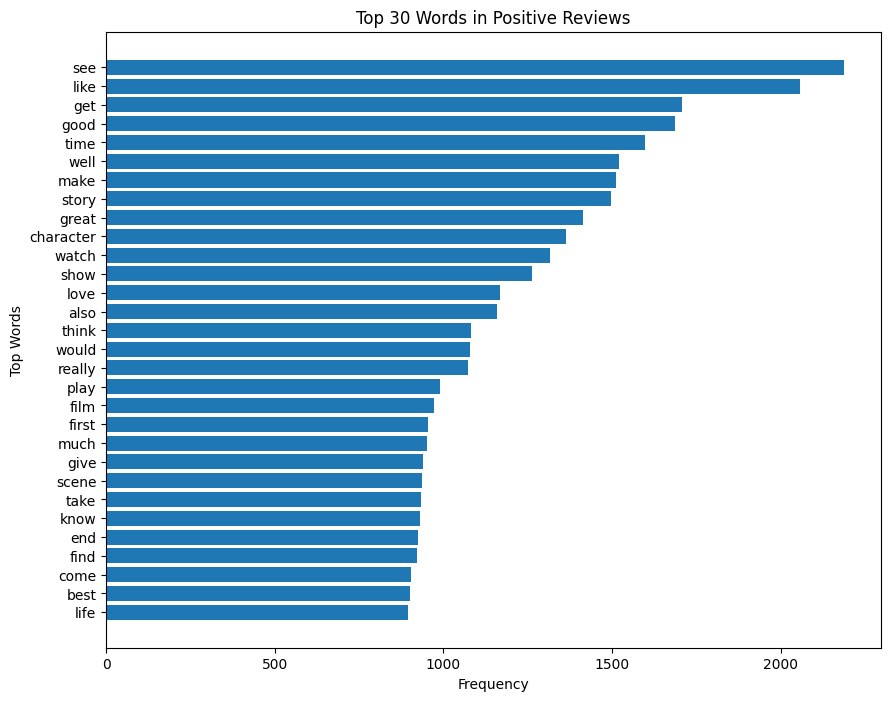

In [57]:
import matplotlib.pyplot as plt
from collections import Counter

positive_reviews = df[df['label'] == 1]['review_processed']
positive_words = ' '.join(positive_reviews).split()
positive_word_counts = Counter(positive_words).most_common(30)

# Plotting the bar chart
plt.figure(figsize=(10, 8))
plt.barh([word for word, _ in positive_word_counts], [count for _, count in positive_word_counts])
plt.xlabel('Frequency')
plt.ylabel('Top Words')
plt.title('Top 30 Words in Positive Reviews')
plt.gca().invert_yaxis()
plt.show()


**15. Create a word cloud**

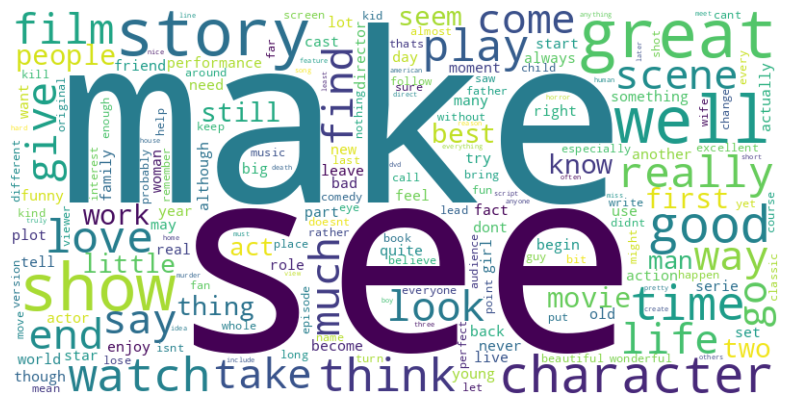

In [58]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**16. Import CountVectorizer and create a sparse matrix of 2,500 tokens. Split the data
set into train and test (20%) set**

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Initialize CountVectorizer with a maximum of 2500 features
vectorizer = CountVectorizer(max_features=2500)

# Fit and transform the 'review_processed' column to create the sparse matrix
X = vectorizer.fit_transform(df['review_processed']).toarray()

# Define the labels
y = df['label']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Output shapes to verify the splitting and matrix creation
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 2500), (1000, 2500), (4000,), (1000,))

**17. Use the GaussianNB to train the model on the training data. Provide the
accuracy of the model**

**18. Test the model on the test set**

In [60]:
# Model Training
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.72


**19. Create the confusion matrix and classification report**

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate the classification report
classification_report = classification_report(y_test, y_pred)

print(f"Confusion Matrix : \n {conf_matrix}")
print('\n')
print(f"Classification Report : \n {classification_report}")

Confusion Matrix : 
 [[392  92]
 [188 328]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.81      0.74       484
           1       0.78      0.64      0.70       516

    accuracy                           0.72      1000
   macro avg       0.73      0.72      0.72      1000
weighted avg       0.73      0.72      0.72      1000



**20. Use Seaborn heatmap to show TP, FP, TN, FN values**

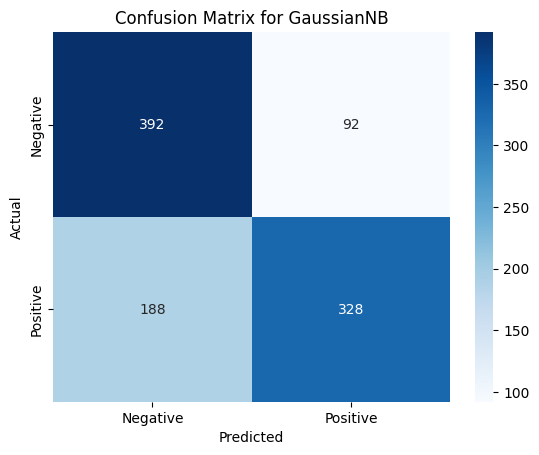

In [62]:
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GaussianNB')
plt.show()


**21. Use a logistic regression model and check the accuracy of the model for C=0.01,
0.05, 0.5, 0.5, and 1**

In [63]:
from sklearn.linear_model import LogisticRegression

# Define the list of C values to test
c_values = [0.01, 0.05, 0.1, 0.5, 1]

# Dictionary to store accuracies for each C value
accuracy_scores = {}

# Loop over each C value, train the logistic regression model, and calculate accuracy
for c in c_values:
    # Initialize the logistic regression model with the specified C value
    model = LogisticRegression(C=c, max_iter=1000, random_state=17)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[c] = accuracy

# Print accuracy scores
print("Logistic Regression Model Accuracy for different values of C:\n")
for C, accuracy in accuracy_scores.items():
    print(f"   C = {C:>4}: Accuracy = {accuracy * 100:.2f}%")

Logistic Regression Model Accuracy for different values of C:

   C = 0.01: Accuracy = 82.40%
   C = 0.05: Accuracy = 82.80%
   C =  0.1: Accuracy = 83.00%
   C =  0.5: Accuracy = 82.70%
   C =    1: Accuracy = 82.60%


**22. Provide the ROC curve. What is the area under the curve?**

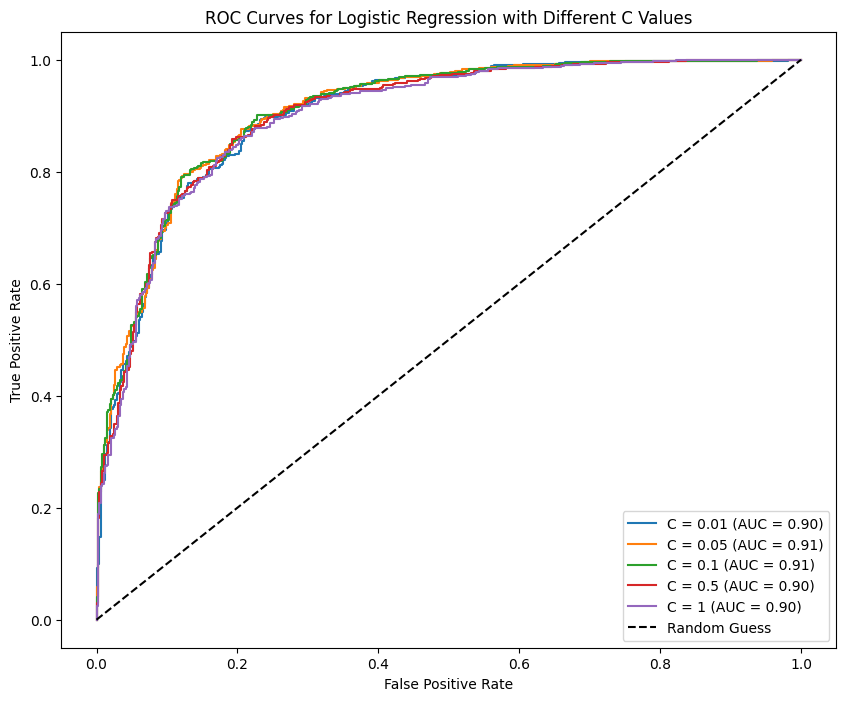

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score

# Define the list of C values to test
C_values = [0.01, 0.05, 0.1, 0.5, 1]

# Dictionary to store AUC scores for each C value
auc_scores = {}

# Plotting the ROC curves for each C value
plt.figure(figsize=(10, 8))

for C in C_values:
    # Initialize the logistic regression model with the specified C value
    model = LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict probabilities for ROC curve calculation
    y_probs = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calculate the area under the ROC curve (AUC)
    auc_score = roc_auc_score(y_test, y_probs)
    auc_scores[C] = auc_score  # Store AUC score for each C value

    # Plot each ROC curve
    plt.plot(fpr, tpr, label=f'C = {C} (AUC = {auc_score:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression with Different C Values')
plt.legend()
plt.show()
